<a href="https://colab.research.google.com/github/pitaconsumer/Capstone-5/blob/master/Copy_of_Capstone_5_Unsupervised_Learning__Twitter_Build_A_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Sentiment Analysis of Tweets 
## Background
Since Iran’s Foreign Minister tweeted that Iran was providing medical aid to Lebanon, PITAPOLICY conducted a twitter sentiment analysis of Iran’s Foreign Minister Javed Zarif in the midst of Lebanon’s tragic, non-nuclear explosion to review official leaders’ responses on social media regarding aid to Lebanon. Below are sample results of his 200 most recent tweets. Although mostly positive or neutral with respect to the Beirut Explosion in expressing humanitarian solidarity, the negative tweets reference discussion on deteriorating relations with the U.S. and hopes for reinitiating the Joint Comprehensive Plan of Action, JCPOA, regarding Iran’s previous nonproliferation agreement. In 2016, Donald Tr ump’s administration removed the U.S. from this peaceful measure towards nuclear containment. 

## Goal: Use Clustering Techniques to Review Sentiment of Tweets
Work to tune a variety of models before choosing what you consider to be the best performer.

## Research Question: How can @PITAPOLICY use Latent Semantic Analysis and clustering techniques to segment a controversial political figure's tweets to understand where he is most polarizing?

## Methodology: 

#### 1
Clean tweets to review sentiment.
#### 2
Use vocabulary based on Textblob library, which includes its own biases, to measure 'polarity', 'subjectivity', 'posivity', 'negativity', and 'neutral'. 

#### 3
We could use a LSA used to compare how similar the tweets are to one another in the dataset since that is unlabeled. 

#### 4
Split tweets into training and test data sets to see how similar his tweets are to another--we are looking for content consistency. 

#### 5
We could  use Word2Vec and plot using t-SNE cluster on out Twitter dataset to determine which phrases appear the most frequently in tweets to compare with whether they have been retweeted or flagged.

## Summary of Results:
We see that Javed Zarif has 1584269 followers.

As mentioned earlier, this Twitter account’s sample (@Jzarif) of 200 tweets reflects mostly positive tweets as shown. (http://www.pitapolicy.com/twitter-sentiment-analysis-of-iranian-foreign-minister-javed-zarif/) We again see it in the more recent graph shown in green representing mostly positive tweets during crisis. Approximately 75 percent of the tweets are positive, thus 25 percent are neutral.

We measured both ‘subjectivity’ and ‘polarity’ and see that Javed’s tweets concentrate between -0.2 and .4 on the ‘polarity’ and skew positively.

These were the top 10 hashtags and themes trending in Washington, DC at that time:
* Biden 
* Lebanon 
* Hiroshima 
* #BB22
* #FOURTHCOUNTDOWN 
* The NRA 
* Pence 
* Lakers 
* Letitia James 
* Independence Day

After completing TFIDF, we constructed an LSA model to identify semantic analysis. We see that there's little difference between the train and test sets of LSA samples. As such, PITAPOLICY concludes that the Twitter user is consistent about his messages. 

Regarding more unsupervised techniques, like clustering: we employed 'K-means', 'DBSAN', and 'T-SNE'. T-SNE ploted more clustered topics than K-Means. DBSCAN cluster showed the least promising results.

In future, we will use TFIDF to compare topic modeling results using Latent Dirichlect Allocation and Non-negative Matrix Formation (NNMF).

In [ ]:
import tweepy 
from textblob import TextBlob
import re
from wordcloud import WordCloud
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns

import gensim 
from gensim.models import Word2Vec
from gensim.models import word2vec

import nltk
from nltk.corpus import stopwords
from collections import Counter

import folium

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# from secrets import consumer_key,consumer_secret
#Need the API
    #consumer_key = ""
    #consumer_secret = ""

consumer_key = 'R8y38TnjdzbUMhXmiqrdOlFNo'
consumer_secret = '0SHVRVqighg3nbvU72303AVCNmyue6usBukhB7xiUZlL5wo3nE' 

auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)

In [ ]:
#Extract 200 Tweets from the Twitter User
zarif_tweets = api.user_timeline(screen_name = 'JZarif', count = 500, 
                                 lang ='en', tweet_mode = 'extended')

#Show the 10 most recent tweets
print("Show the 10 most recent tweets: \n")
i =1
for tweet in zarif_tweets[0:9]:
    print (str(i) +') '+ tweet.full_text + '\n')
    i = i + 1

Show the 10 most recent tweets: 

1) Outlaw @SecPompeo has no qualms about violating his own country's laws.

Standing next to World's #1 nuclear threat, he declares his desire to flood our region with even more US weapons—all while trying to impede lawful normalization of Iran's defense 
cooperation with the world. https://t.co/dXdJBZgAt5

2) My fifth and concluding online discussion of the World in Transition.

Today, Aug 24, From 12:30 to 13:15 UTC;

Topic: Iran and the World in Transition;

Faculty of World Studies, University of Tehran.

Live Instagram @iranian_studies_ut https://t.co/is8ClvsrKM

3) In their own words: https://t.co/fFNjWj5xQa

4) Factsheet on the illegitimate and felonious U.S. attempt to re-impose U.N. sanctions on Iran https://t.co/wPbFytmA98

5) أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌حمد البوسعيدي تعيينه وزيراً لخارجية سلطنة عمان الشقیقه وقد استلم الأمانة من أخ حكيم معالي يوسف بن علوي.
أتمنى للأخ بدر كل التوفيق والسداد في مسيرته وأرجو أن يجد من إخوانه في 

In [ ]:
#Create a dataframe with a column and label column as 'Tweets'
import pandas as pd
df = pd.DataFrame([tweet.full_text for tweet in zarif_tweets], columns = ['Tweets'])
df.head(10)

,Tweets
0,Outlaw @SecPompeo has no qualms about violatin...
1,My fifth and concluding online discussion of t...
2,In their own words: https://t.co/fFNjWj5xQa
3,Factsheet on the illegitimate and felonious U....
4,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...
5,"67 years ago today, US/UK tried to suffocate t..."
6,I'll be delivering the fourth of five online t...
7,.@AmbJohnBolton has repeated today what he sai...
8,"""Pirates of the Caribbean"" have their own judg..."
9,RT @TakhtRavanchi: The result of the vote in #...


In [ ]:
#Insert additional columns: 'retweet_count', 'user'
zarif_tweets_user = api.get_user('jzarif')

In [ ]:
zarif_tweets_user.status.text

"Outlaw @SecPompeo has no qualms about violating his own country's laws.\n\nStanding next to World's #1 nuclear threat… https://t.co/oDDAxza14L"

In [ ]:
#get description for column
zarif_tweets_user.description

'Foreign Minister of Islamic Republic of Iran'

In [ ]:
#followers as a column
followers = zarif_tweets_user.followers
followers


<bound method User.followers of User(_api=<tweepy.api.API object at 0x7f51d7fe9518>, _json={'id': 47813521, 'id_str': '47813521', 'name': 'Javad Zarif', 'screen_name': 'JZarif', 'location': 'Tehran, Iran', 'profile_location': None, 'description': 'Foreign Minister of Islamic Republic of Iran', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 1584484, 'friends_count': 10, 'listed_count': 4061, 'created_at': 'Wed Jun 17 01:54:58 +0000 2009', 'favourites_count': 6, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': True, 'statuses_count': 957, 'lang': None, 'status': {'created_at': 'Mon Aug 24 12:28:54 +0000 2020', 'id': 1297873515992023040, 'id_str': '1297873515992023040', 'text': "Outlaw @SecPompeo has no qualms about violating his own country's laws.\n\nStanding next to World's #1 nuclear threat… https://t.co/oDDAxza14L", 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': '

In [ ]:
#Number of Followers
zarif_tweets_user.followers_count

1584484

In [ ]:
#Number of Friends
zarif_tweets_user.friends_count


10

In [ ]:
followers =[]

In [ ]:
cursor = tweepy.Cursor(api.followers, screen_name ='zarif_tweets_user')
cursor

In [ ]:
cursor = tweepy.Cursor(api.followers, screen_name = 'JZarif', count= 200) #Default is groups of 20.
for account in cursor.items(10):
    followers.append(account.screen_name)
    print(followers)

['Mjnnoroz1']
['Mjnnoroz1', 'OmedDos22095079']
['Mjnnoroz1', 'OmedDos22095079', 'lttEuZpA1jlsg0b']
['Mjnnoroz1', 'OmedDos22095079', 'lttEuZpA1jlsg0b', 'datzamiiir']
['Mjnnoroz1', 'OmedDos22095079', 'lttEuZpA1jlsg0b', 'datzamiiir', 'DMirbaghery']
['Mjnnoroz1', 'OmedDos22095079', 'lttEuZpA1jlsg0b', 'datzamiiir', 'DMirbaghery', 'mjan_saif']
['Mjnnoroz1', 'OmedDos22095079', 'lttEuZpA1jlsg0b', 'datzamiiir', 'DMirbaghery', 'mjan_saif', 'lbrahimMTaha2']
['Mjnnoroz1', 'OmedDos22095079', 'lttEuZpA1jlsg0b', 'datzamiiir', 'DMirbaghery', 'mjan_saif', 'lbrahimMTaha2', 'DrFrank96909170']
['Mjnnoroz1', 'OmedDos22095079', 'lttEuZpA1jlsg0b', 'datzamiiir', 'DMirbaghery', 'mjan_saif', 'lbrahimMTaha2', 'DrFrank96909170', 'JavadNorouzi3']
['Mjnnoroz1', 'OmedDos22095079', 'lttEuZpA1jlsg0b', 'datzamiiir', 'DMirbaghery', 'mjan_saif', 'lbrahimMTaha2', 'DrFrank96909170', 'JavadNorouzi3', 'Taherrezaei14']


In [ ]:
print("Followers:", ''.join(sorted(followers, key=lambda s:s.lower())))
#normalize by number of followers based on RT's

Followers: datzamiiirDMirbagheryDrFrank96909170JavadNorouzi3lbrahimMTaha2lttEuZpA1jlsg0bmjan_saifMjnnoroz1OmedDos22095079Taherrezaei14


In [ ]:
#Determine who Javed Zarif follows: 'friends'
friends = []
cursor = tweepy.Cursor(api.friends, screen_name = 'JZarif')
for friend in cursor.items(10):
    friends.append(friend.screen_name)
print (friends)

['IPIS_Iran', 'TakhtRavanchi', 'IranForMin', 'SAMOUSAVI9', 'IRIMFA_EN', 'IRIMFA_AR', 'ebtekarm', 'araghchi', 'khamenei_ir', 'HassanRouhani']


In [ ]:
print('Friends:', ''.join(sorted(friends, key =  lambda s: s.lower())))
#Label as 'friends'

Friends: araghchiebtekarmHassanRouhaniIPIS_IranIranForMinIRIMFA_ARIRIMFA_ENkhamenei_irSAMOUSAVI9TakhtRavanchi


## Clean Text


In [ ]:
#Create a function to clean tweets
    
def clean_text(text):
    text = re.sub(r'@{[A-Za-z0-9]+', '', text)  #Checking for '@' and all upper case letters following
    text = re.sub(r'#', '', text) #Remove hashtag
    text = re.sub(r'RT[\s] +','', text)  #Remove Retweets
    text = re.sub(r'https?:\/\/\S+','',text) #Remove the hyperlink
    
    return text

#Cleaning the text
df['Tweets'] = df['Tweets'].apply(clean_text)
df

,Tweets
0,Outlaw @SecPompeo has no qualms about violatin...
1,My fifth and concluding online discussion of t...
2,In their own words:
3,Factsheet on the illegitimate and felonious U....
4,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...
...,...
195,"Contrary to its deceptive claims, new US regul..."
196,Met with Yemen’s Mohammad Abdul-Salam in Tehra...
197,2500 young entrepreneurs have turned an old bu...
198,The imperative now is to end the incursion int...


In [ ]:
#Select tweets for review
df['tweets_fixed'] = df['Tweets'].apply(lambda x: x if type(x) == str else '')

## Exploratory Data Analysis: Word Cloud
###  Figures 1: Wordclouds¶

<function matplotlib.pyplot.show>

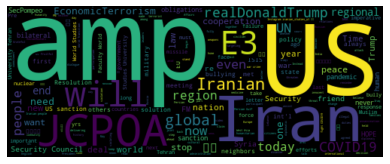

In [ ]:
#Plot the Word Cloud
all_words = ''.join([twts for twts in df['tweets_fixed']])
WordCloud = WordCloud(width = 500, height= 200, random_state = 21, 
                      max_font_size =150).generate(all_words)
plt.imshow(WordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show

In [ ]:
# Find the top 30 words said by each tweet
top_dict = {}
for c in df.columns:
    top = df[c].sort_values(ascending=False).tail(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Tweets': [(137,
   "Appeasement confirmed.\n\nE3 sold out remnants of JCPOA to avoid new Trump tariffs.\n\nIt won't work my friends. You only whet his appetite. Remember your high school bully?\n\nIf you want to sell your integrity, go ahead. But DO NOT assume high moral/legal ground.\n\nYOU DON'T HAVE IT. "),
  (101, 'Aparat\nPersian:\n\n\nEnglish:\n'),
  (180,
   'After getting our hostage back this week, fully ready for comprehensive prisoner exchange.\n \nThe ball is in the US’ court.\n\nToday, back to regional diplomacy in Istanbul, at the Ministerial Heart of Asia mtg, joining forces for peace &amp; development in Afghanistan.\n\nNeighborsFirst '),
  (150,
   'A sad day. Preliminary conclusions of internal investigation by Armed Forces: \n\nHuman error at time of crisis caused by US adventurism led to disaster\n\nOur profound regrets, apologies and condolences to our people, to the families of all victims, and to other affected nations.\n💔'),
  (159,
   'A reminder to those hal

In [ ]:
# Look at the most common top words 
from collections import Counter

# Let's first pull out the top 30 words for each tweet
words = []
for tweet in df.Tweets:
    top = [word for (word, count) in top_dict['Tweets']]
    for t in top:
        words.append(t)
        
words

[137,
 101,
 180,
 150,
 159,
 172,
 160,
 17,
 18,
 188,
 16,
 100,
 5,
 197,
 41,
 162,
 76,
 115,
 130,
 156,
 129,
 108,
 74,
 49,
 7,
 161,
 66,
 8,
 102,
 178,
 137,
 101,
 180,
 150,
 159,
 172,
 160,
 17,
 18,
 188,
 16,
 100,
 5,
 197,
 41,
 162,
 76,
 115,
 130,
 156,
 129,
 108,
 74,
 49,
 7,
 161,
 66,
 8,
 102,
 178]

## Measuring Javed Zarif's Polarity & Subjectivity


In [ ]:
#Create a function to get 'subjectivity' and 'polarity'

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns
df['subjectivity'] = df['tweets_fixed'].apply(get_subjectivity)
df['polarity'] = df['tweets_fixed'].apply(get_polarity)

#Show the new dataframe
df


,Tweets,tweets_fixed,subjectivity,polarity
0,Outlaw @SecPompeo has no qualms about violatin...,Outlaw @SecPompeo has no qualms about violatin...,0.375000,0.275000
1,My fifth and concluding online discussion of t...,My fifth and concluding online discussion of t...,0.500000,0.136364
2,In their own words:,In their own words:,1.000000,0.600000
3,Factsheet on the illegitimate and felonious U....,Factsheet on the illegitimate and felonious U....,0.000000,0.000000
4,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...,0.000000,0.000000
...,...,...,...,...
195,"Contrary to its deceptive claims, new US regul...","Contrary to its deceptive claims, new US regul...",0.484848,0.045455
196,Met with Yemen’s Mohammad Abdul-Salam in Tehra...,Met with Yemen’s Mohammad Abdul-Salam in Tehra...,0.750000,0.125000
197,2500 young entrepreneurs have turned an old bu...,2500 young entrepreneurs have turned an old bu...,0.500000,-0.133333
198,The imperative now is to end the incursion int...,The imperative now is to end the incursion int...,0.600000,-0.200000


In [ ]:
#Create a function to denote the positive, negative, and neutral analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    if score == 0:
        return 'Neutral'
    if score > 0:
        return 'Positive'
    
df['Analysis'] = df['polarity'].apply(getAnalysis)

#Show df
df

,Tweets,tweets_fixed,subjectivity,polarity,Analysis
0,Outlaw @SecPompeo has no qualms about violatin...,Outlaw @SecPompeo has no qualms about violatin...,0.375000,0.275000,Positive
1,My fifth and concluding online discussion of t...,My fifth and concluding online discussion of t...,0.500000,0.136364,Positive
2,In their own words:,In their own words:,1.000000,0.600000,Positive
3,Factsheet on the illegitimate and felonious U....,Factsheet on the illegitimate and felonious U....,0.000000,0.000000,Neutral
4,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...,0.000000,0.000000,Neutral
...,...,...,...,...,...
195,"Contrary to its deceptive claims, new US regul...","Contrary to its deceptive claims, new US regul...",0.484848,0.045455,Positive
196,Met with Yemen’s Mohammad Abdul-Salam in Tehra...,Met with Yemen’s Mohammad Abdul-Salam in Tehra...,0.750000,0.125000,Positive
197,2500 young entrepreneurs have turned an old bu...,2500 young entrepreneurs have turned an old bu...,0.500000,-0.133333,Negative
198,The imperative now is to end the incursion int...,The imperative now is to end the incursion int...,0.600000,-0.200000,Negative


In [ ]:
#Print all the positive tweets
j =1
sorted_DF = df.sort_values(by = 'polarity')
for i in range(0, sorted_DF.shape[0]):
    if (sorted_DF['Analysis'][i] == 'Positive'):
        print(str(j) + sorted_DF['Tweets'][i])
        print()  #print a new line
        j = j+1

1Outlaw @SecPompeo has no qualms about violating his own country's laws.

Standing next to World's 1 nuclear threat, he declares his desire to flood our region with even more US weapons—all while trying to impede lawful normalization of Iran's defense 
cooperation with the world. 

2My fifth and concluding online discussion of the World in Transition.

Today, Aug 24, From 12:30 to 13:15 UTC;

Topic: Iran and the World in Transition;

Faculty of World Studies, University of Tehran.

Live Instagram @iranian_studies_ut 

3In their own words: 

4I'll be delivering the fourth of five online talks at Faculty of World Studies, University of Tehran, today, Aug 17, 12:30-13:15 UTC

Topic: End of Hegemony

Live Instagram @iranian_studies_ut 

5.@AmbJohnBolton has repeated today what he said on May 8, 2018, while National Security Advisor in the Trump administration.

At least he is consistent—a trait notably absent in this US administration.

US recourse to Dispute Resolution Mechanism in 2231 h

In [ ]:
#Let's see Negative Tweets in new df
j = 1
sorted_DF = df.sort_values(by = 'polarity')
for i in range(0, sorted_DF.shape[0]):
    if (sorted_DF['Analysis'][i] == 'Negative'):
        print(str(j) + ')' + sorted_DF['Tweets'][i])
        print()  #print a new line
        j = j+1

1)67 years ago today, US/UK tried to suffocate the Iranian people’s demand for dignity in a coup overthrowing their elected government. 

Since 1979, the US has desperately tried to resuscitate the past. Yet it keeps getting humiliated by the Iranian people. 

Time to change tack?

2)"Pirates of the Caribbean" have their own judges and courts now.

Sadly for them, stolen booty wasn't Iran's. Fuel was sold F.O.B. Persian Gulf. Ship and flag weren't ours either.

Hollow, cheap propaganda doesn’t deflect from miserable failure of US diplomatic malpractice at UN.

3)US is so desperate to show support for its struggle to illegally extend arms restrictions on Iran that it clings to the personal position of GCC SG—obtained thru coercion—as regional consensus.

All knew that most in the region—even in GCC—do NOT subscribe to this.

Here's proof: 

4)I just published Using Security Council to Destroy Security Council 

5)75 years ago today, the US gained the infamy of becoming the 1st and ONLY 

## Sentiment Analysis: Visualize Tweets by Minister Zarif
### Figure 2: Sentiment Analysis Regarding Subjectivity

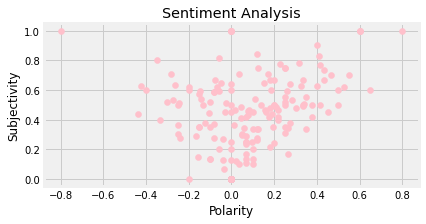

In [ ]:
#Plot the polarity and subjectivity
plt.figure(figsize=(6,3)) 
for i in range(0, sorted_DF.shape[0]): 
    plt.scatter(df['polarity'][i], df['subjectivity'][i], color = 'Pink') 

plt.title ('Sentiment Analysis' ) 
plt.xlabel ('Polarity') 
plt.ylabel ('Subjectivity')     
plt.show()
    

In [ ]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

#round ((ptweets.shape[0] / df.shape[0])*100,1)

print(ptweets)

0      Outlaw @SecPompeo has no qualms about violatin...
1      My fifth and concluding online discussion of t...
2                                   In their own words: 
6      I'll be delivering the fourth of five online t...
7      .@AmbJohnBolton has repeated today what he sai...
                             ...                        
190    To my EU/E3 Colleagues \n1."Fully upheld commi...
191    Pleased to be in Turkey, attending 24th minist...
192    Our response to US EconomicTerrorism &amp; bla...
195    Contrary to its deceptive claims, new US regul...
196    Met with Yemen’s Mohammad Abdul-Salam in Tehra...
Name: Tweets, Length: 97, dtype: object


In [ ]:
round ((ptweets.shape[0] / df.shape[0])*100,1)

48.5

In [ ]:
# Get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

#round ((ptweets.shape[0] / df.shape[0])*100,1)

print(ntweets)

5      67 years ago today, US/UK tried to suffocate t...
8      "Pirates of the Caribbean" have their own judg...
11     US is so desperate to show support for its str...
12     I just published Using Security Council to Des...
16     75 years ago today, the US gained the infamy o...
31     As we mark EidAlAdha (Feast of the Sacrifice),...
39     Productive talks in Baghdad with PM @MAKadhimi...
41     25 yrs ago today, SrebrenicaGenocide began as ...
43     Don't believe the hype: Iran triggered JCPOA D...
47     The US isn't merely violating JCPOA and bullyi...
49     .@SecPompeo is so desperate to mislead the wor...
50     E3 must stop public face-saving &amp; muster t...
52     Iran &amp; Russia are "determined to deal with...
54     Productive talks with my friend @MevlutCavusog...
55     International Criminal COURT now blackmailed b...
57     US has tried to heighten tension w/ Iran &amp;...
58     We achieved humanitarian swap *despite* your s...
62     Some don't think BlackLi

In [ ]:
round ((ntweets.shape[0] / df.shape[0])*100,1)

23.5

### Figure 3: Sentiment Analysis - Polarity

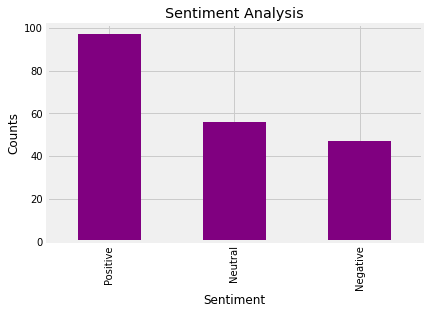

In [ ]:
#Show the value counts
df['Analysis'].value_counts()

#Plot and show
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel ('Counts')
df['Analysis'].value_counts().plot(kind='bar', color = 'Purple')
plt.show()

In [ ]:
#What did I wrong: not seeing new columns "id", 'retweets'
class TweetAnalyzer():
    """
    Functionality for analyzing and categorizing content from tweets.
    """
    def tweets_to_data_frame(self, tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in zarif_tweets], columns=['Tweets'])

        df['id'] = np.array([tweet.id for tweet in zarif_tweets])
        df['len'] = np.array([len(tweet.text) for tweet in zarif_tweets])
        df['date'] = np.array([tweet.created_at for tweet in zarif_tweets])
        df['source'] = np.array([tweet.source for tweet in zarif_tweets])
        df['likes'] = np.array([tweet.favorite_count for tweet in zarif_tweets])
        df['retweets'] = np.array([tweet.retweet_count for tweet in zarif_tweets])
df

,Tweets,tweets_fixed,subjectivity,polarity,Analysis
0,Outlaw @SecPompeo has no qualms about violatin...,Outlaw @SecPompeo has no qualms about violatin...,0.375000,0.275000,Positive
1,My fifth and concluding online discussion of t...,My fifth and concluding online discussion of t...,0.500000,0.136364,Positive
2,In their own words:,In their own words:,1.000000,0.600000,Positive
3,Factsheet on the illegitimate and felonious U....,Factsheet on the illegitimate and felonious U....,0.000000,0.000000,Neutral
4,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...,0.000000,0.000000,Neutral
...,...,...,...,...,...
195,"Contrary to its deceptive claims, new US regul...","Contrary to its deceptive claims, new US regul...",0.484848,0.045455,Positive
196,Met with Yemen’s Mohammad Abdul-Salam in Tehra...,Met with Yemen’s Mohammad Abdul-Salam in Tehra...,0.750000,0.125000,Positive
197,2500 young entrepreneurs have turned an old bu...,2500 young entrepreneurs have turned an old bu...,0.500000,-0.133333,Negative
198,The imperative now is to end the incursion int...,The imperative now is to end the incursion int...,0.600000,-0.200000,Negative


In [ ]:
#Review subjectivity and polarity of Zarif
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['tweets_fixed'].apply(pol)
df['subjectivity'] = df['tweets_fixed'].apply(sub)
df

,Tweets,tweets_fixed,subjectivity,polarity,Analysis
0,Outlaw @SecPompeo has no qualms about violatin...,Outlaw @SecPompeo has no qualms about violatin...,0.375000,0.275000,Positive
1,My fifth and concluding online discussion of t...,My fifth and concluding online discussion of t...,0.500000,0.136364,Positive
2,In their own words:,In their own words:,1.000000,0.600000,Positive
3,Factsheet on the illegitimate and felonious U....,Factsheet on the illegitimate and felonious U....,0.000000,0.000000,Neutral
4,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...,0.000000,0.000000,Neutral
...,...,...,...,...,...
195,"Contrary to its deceptive claims, new US regul...","Contrary to its deceptive claims, new US regul...",0.484848,0.045455,Positive
196,Met with Yemen’s Mohammad Abdul-Salam in Tehra...,Met with Yemen’s Mohammad Abdul-Salam in Tehra...,0.750000,0.125000,Positive
197,2500 young entrepreneurs have turned an old bu...,2500 young entrepreneurs have turned an old bu...,0.500000,-0.133333,Negative
198,The imperative now is to end the incursion int...,The imperative now is to end the incursion int...,0.600000,-0.200000,Negative


## Analysis II: Topic Modeling
### LSA Model
Apply LSA Model to Training Set
We are applying the Latent Semantic Analysis, instead of the Vector Space Model, to conduct a tweet similarity analysis because our body of 200 tweets is long. Also, LSA recognizes the occurence of synonyms rather than counting them as different from each other. In addition to context, LSA considers how a word can be used for slightly different meanings. The goal is to identify clusters of terms that reflect topics appearing in Zarif's tweets.

**Note: LSA is the process of applying feature dimension reduction to a tf-idf term-document matrix. Since we don't want to mean-center our variables, which means we lose sparsity, we will use another dimension reduction method aside from Pincipal Compenent Analysis. This is called Singular Value Decomposition (SVD).

Dimension reduction: Singular Value Decomposition (SVD)
We have our vectors, with one vector per tweet. Will use a dimension reduction technique called Singular Value Decomposition (SVD) function from sklearn rather than PCA because we don't want to mean-center our variables (and thus lose sparsity).



In [ ]:
from sklearn.model_selection import train_test_split
# Need vectors for LSA  modeling. 
#Substitute 'emma_pars' with our text of fixed tweets: 'tweets_fixed'
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test = train_test_split(df['tweets_fixed'], test_size=0.4, random_state=0)

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the tweets
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


In [ ]:
#Applying the vectorizer
tweets_fixed_tfidf = vectorizer.fit_transform(df['tweets_fixed'])
print("Number of features: %d" % tweets_fixed_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(tweets_fixed_tfidf, test_size=0.4, random_state=0)


#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]

#A list of dictionaries, one per paragraph
tfidf_by_tweet = [{} for _ in range(0,n)]

#List of features
terms = vectorizer.get_feature_names()

#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_by_tweet[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_train[1])
print('Tf_idf vector:', tfidf_by_tweet[1])

Number of features: 696
Original sentence: My fifth and concluding online discussion of the World in Transition.

Today, Aug 24, From 12:30 to 13:15 UTC;

Topic: Iran and the World in Transition;

Faculty of World Studies, University of Tehran.

Live Instagram @iranian_studies_ut 
Tf_idf vector: {'res': 0.24829312999774658, 'address': 0.26282014423361305, 'return': 0.24829312999774658, 'respect': 0.26282014423361305, 'face': 0.24829312999774658, 'general': 0.24829312999774658, 'rule': 0.22781845339577755, 'law': 0.38563352511588395, 'int': 0.22003434261948152, 'community': 0.23702510234848578, 'important': 0.22003434261948152, 'english': 0.22781845339577755, 'council': 0.20202341151065023, 'unsc': 0.22781845339577755, 'persian': 0.20202341151065023, '2231': 0.21329143915991103, 'security': 0.17522840099283243}


In [ ]:
tweets_fixed_tfidf.shape

(200, 696)

#### We have 696 features in our term frequency inverse document frequency matrix.

In [ ]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
#data_cv = cv.fit_transform(data_clean.transcript)
df_cv = cv.fit_transform(df.tweets_fixed)

#data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
df_dtm = pd.DataFrame(df_cv.toarray(), columns=cv.get_feature_names())

#data_dtm.index = data_clean.index
df_dtm.index = df.tweets_fixed.index

#data_dtm
df_dtm

,000,10,1000s,104,11,12,1230,13,15,16,1600,17,18,19,1906,1947,1979,1982,19th,1st,20,2016,2017,2018,2019,2020,21,2231,24,24th,25,2500,27,280,2nd,30,36,3rd,40,41st,...,也更成功,也祝中国朋友们新年快乐,伊朗人说,伊朗始终与中国人民站在一起,伊朗都坚定与中国站在一起,借此机会,兄弟犹如手足亲,共同反对单边主义,加强在国际事务中相互支持等议题达成共识,反对削弱伊核协议,在2020年,在中国端午节来临前夕,在同我的好朋友,在抗击新型冠状病毒感染肺炎疫情过程中,多边主义及国际法的支持,岂曰无衣,希望全体中国人民度过一个健康祥和的春节,很高兴同中国国务委员兼外长王毅举行视频会晤,我们就共同抗击新冠肺炎疫情,我们就深化两国全面战略伙伴关系,我们谴责美国趁人之危的做法,我们都重申对伊核协议,我对中国抗击疫情的成功举措表示赞赏和感谢,我对中方向伊朗提供抗疫物资并派医疗专家表示感谢,我希望推动伊中全面战略伙伴关系持续稳步发展,我很高兴在北京和中国朋友们共同度过了2019年的最后一天,推动25年双边合作计划,无论何时何地,无论顺境逆境,更阻止疫情向国际蔓延,比起2009年美国对h1n1流感的防控,祝福中国人民鼠年安康,要特别祝中国朋友们端午安康,让人们对中国打赢疫情防控战充满信心,谴责美国持续非法制裁严重妨碍伊朗抗击疫情努力,造物之初本一体,阿丹子孙皆兄弟,阿富汗和平进程等共同关心的问题交换了意见,非常高兴再次和我的老朋友,鼠年吉祥
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
198,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 704 features to 130. 
 ## We subsitute 'svd' as our pca for dimension reduction.
svd = TruncatedSVD(130)
lsa = make_pipeline(svd, Normalizer(copy=False))

# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)

print(X_train_lsa.shape)

variance_explained = svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of tweets (paragraphs) our solution considers similar, 
#for the first five identified topics
#paras_by_component = pd.DataFrame(X_train_lsa,index=X_train)
tweets_by_component = pd.DataFrame(X_train_lsa,index=X_train)
for i in range(5):
    print('Component {}:'.format(i))

(120, 120)
Percent variance captured by all components: 100.0
Component 0:
Component 1:
Component 2:
Component 3:
Component 4:


In [ ]:
print(tweets_by_component.loc[:,i].sort_values(ascending=False)[0:10])

tweets_fixed
Have you EVER seen such a sea of humanity in your life, @realdonaldtrump?\n\nDo you still want to listen to the clowns advising you on our region?\n\nAnd do you still imagine you can break the will of this great nation &amp; its people?\n\nEnd of malign US presence in West Asia has begun.          0.411270
24 hrs ago, an arrogant clown— masquerading as a diplomat— claimed people were dancing in the cities of Iraq.\n\nToday, hundreds of thousands of our proud Iraqi brothers and sisters offered him their response across their soil.\n\nEnd of US malign presence in West Asia has begun.                   0.404452
What the US has accomplished in its terrorist assassination of anti-ISIS heroes is to unleash global anti-US fury and a worldwide rancor—on a scale not seen in recent memory.\n\nEnd of malign U.S. presence in West Asia has begun.                                                                      0.378944
-Having committed grave breaches of int'l law in Friday's cowar

### Sentence similarity
We can also look at how similar various tweets are to one another. For example, here are the similarity scores (as a heatmap) of the first 10 tweets in the training set:

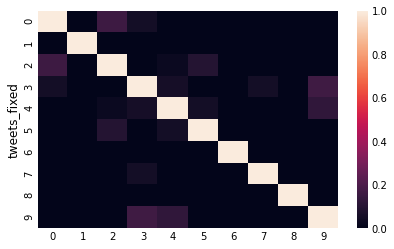

Key:
0 Latest E3 letter to UNSG on missiles is a desperate falsehood to cover up their miserable incompetence in fulfilling bare minimum of their own JCPOA obligations

If E3 want a modicum of global credibility, they can begin by exerting sovereignty rather than bowing to US bullying. 
1 The int'l community in general—and UN Security Council in particular—face an important decision: Do we maintain respect for rule of law, or do we return to law of the jungle? 

My address before UNSC on Res. 2231 

Persian: 
English:  
2 E3 think they’re living in the 19th Century, when they dictated to countries, lied, &amp; got away with it.

-IRAN triggered the DRM

-IRAN is NOT the one emptying the accord of its substance—the E3 is

Forget about compensating for U.S: fulfill your own obligations. 

EVEN JUST ONE. 
3 Contrary to its deceptive claims, new US regulations will aggravate EconomicTerrorism on ordinary Iranians. @SecPompeo voiced his delusion that Iranian people must bow to US "if they w

In [ ]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_train_lsa) * np.asmatrix(X_train_lsa).T)

#Only taking the first 10 tweets
sim_matrix = pd.DataFrame(similarity,index=X_train).iloc[0:10,0:10]

#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])

### Apply LSA to Test Set

In [ ]:
# Run SVD on the test data, then project the test data.
X_test_lsa = lsa.fit_transform(X_test_tfidf)

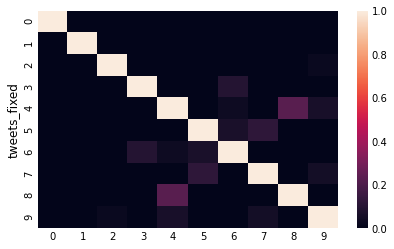

Key:
0 @iabbasian سلام دوست عزیزم. من خودم به عربی و انگلیسی امتحان کردم. برای لبنان، ایران، عراق، پاکستان و آلمان. برای همه همین مشکل بود. ولی برای اسراییل و آمریکا نبود.  از چند نفر از دوستان هم درخواست کردم در خارج از ایران امتحان کنند. آنها هم به همین مشکل برخوردند.
1 و کما جرت العادة، قمت أمس واليوم بزيارة مسقط للتباحث والتشاور مع كبار المسؤولين في سلطنة عمان بخصوص العلاقات الثنائية والقضايا الإقليمية والدولية.
 كانت ولاتزال ايران وعمان دولتين جارتين تربطهما علاقات حميمة جدا. 

سنبقى دائما الى جانب سلطنة عمان.
دولة_راسخة_شعب_قوي 
2 IMF's @KGeorgieva has stated that countries affected by COVID19 will be supported via Rapid Financial Instrument. Our Central Bank requested access to this facility immediately. 

IMF/IMF Board should adhere to Fund's mandate, stand on right side of history &amp; act responsibly.
3 Important message of President @HassanRouhani to American people:


4 Taking unprecedented step of punishing those who seek to COMPLY with UN Security Council isn't enough fo

In [ ]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_test_lsa) * np.asmatrix(X_test_lsa).T)

#Only taking the first 10 tweets
sim_matrix = pd.DataFrame(similarity,index = X_test).iloc[0:10,0:10]

#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels = range(10))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])

## Clustering
### K- Means 

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
X1 = oe.fit_transform(tweets_by_component)
X1

array([[ 85.,   9.,  37., ...,  57.,  57.,  56.],
       [ 42.,  28.,  84., ..., 100.,  78.,  88.],
       [105.,  13.,  20., ...,  69.,  36.,  73.],
       ...,
       [ 56.,  71.,  90., ...,  36.,  77.,  94.],
       [ 75.,  24.,  40., ...,  99., 108.,  63.],
       [100.,  22.,  70., ...,  27.,  69.,  56.]])

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn import cluster

kmeans = cluster.MiniBatchKMeans(n_clusters=20)

kmeans.fit(X1)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=20, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [ ]:
k_means = KMeans(n_clusters=20, random_state=123)
k_means.fit(X1)
y_pred = k_means.predict(X1)

## Plot the solution.
#plt.scatter(all_data[:,0], all_data[:,1], c=y_pred)
#plt.show()

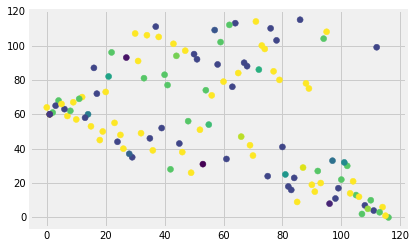

In [ ]:
# Plot the KMeans solution.
plt.scatter(X1[:,0], X1[:,1], c=y_pred)
plt.show()

### Visualizing Vectors: TSNE Plot¶
Using 'word2vec' allows us to identify similarities between words that never occur near one another in the tweets.

In [ ]:
def tsne_plot(model):
    "Creates a TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='svd', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tweets_by_component) #SVD: substituted dimension reduction for 'pca'

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy =(x[i], y[i]),
                     xytext =(5, 2),
                     textcoords ='offset points',
                     ha ='right',
                     va ='bottom')
    plt.show()

In [ ]:
from gensim.models import Word2Vec

word2vec = Word2Vec(df.tweets_fixed, min_count=2)

In [ ]:
vocabulary = word2vec.wv.vocab
print(vocabulary)

{'O': <gensim.models.keyedvectors.Vocab object at 0x7f51d0c375f8>, 'u': <gensim.models.keyedvectors.Vocab object at 0x7f51d0c37f98>, 't': <gensim.models.keyedvectors.Vocab object at 0x7f51d0c37588>, 'l': <gensim.models.keyedvectors.Vocab object at 0x7f51d0c37c50>, 'a': <gensim.models.keyedvectors.Vocab object at 0x7f51d0c376a0>, 'w': <gensim.models.keyedvectors.Vocab object at 0x7f51d0c37ba8>, ' ': <gensim.models.keyedvectors.Vocab object at 0x7f51d0c37780>, '@': <gensim.models.keyedvectors.Vocab object at 0x7f51d0c370b8>, 'S': <gensim.models.keyedvectors.Vocab object at 0x7f51d0c376d8>, 'e': <gensim.models.keyedvectors.Vocab object at 0x7f51d0c37ef0>, 'c': <gensim.models.keyedvectors.Vocab object at 0x7f51d0c37128>, 'P': <gensim.models.keyedvectors.Vocab object at 0x7f51d0c37400>, 'o': <gensim.models.keyedvectors.Vocab object at 0x7f51d0c37278>, 'm': <gensim.models.keyedvectors.Vocab object at 0x7f51d0c37630>, 'p': <gensim.models.keyedvectors.Vocab object at 0x7f51d0c37a90>, 'h': <gen

In [ ]:
##Correction
#print(tweets_by_component)

model = word2vec.Word2Vec(vocabulary, size=100, window=20, min_count=500, workers=4)
tsne_plot(model)

AttributeError: ignored

### DBSCAN Cluster¶

In [ ]:
#new cluster 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

dbscan_cluster = DBSCAN(eps=1, min_samples=5)

# Fit model
clusters = dbscan_cluster.fit_predict(tweets_by_component)

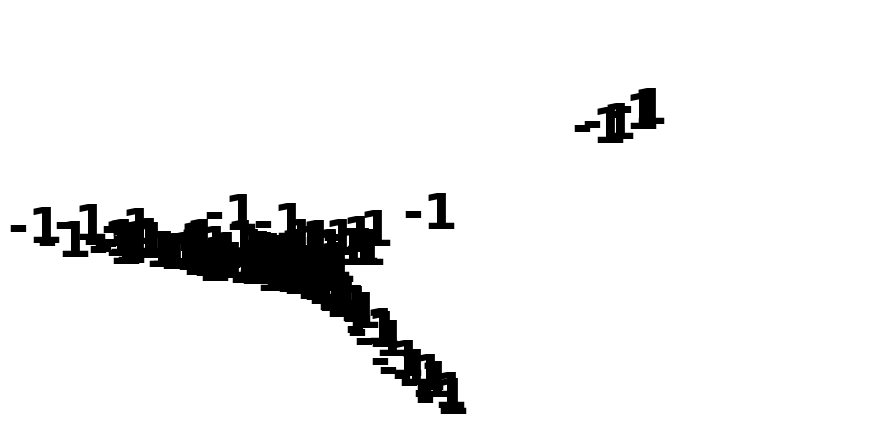

In [ ]:
pca = PCA(n_components=2).fit_transform(tweets_by_component)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             #color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

### Agglommerative Cluster

In [ ]:
from sklearn.cluster import AgglomerativeClustering
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=5) #select 5 clusters

# Fit model
clusters = agg_cluster.fit_predict(tweets_by_component)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0,
       0, 4, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn import cluster

kmeans = cluster.MiniBatchKMeans(n_clusters=20)

kmeans.fit(X1)

#Extract 200 Tweets from the Twitter User
zarif_tweets = api.user_timeline(screen_name = 'JZarif', count = 500, 
                                 lang ='en', tweet_mode = 'extended')

#Show the 10 most recent tweets
print("Show the 10 most recent tweets: \n")
i =1
for tweet in zarif_tweets[0:9]:
    print (str(i) +') '+ tweet.full_text + '\n')
    i = i + 1